In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import lineardensity as lin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pdb_v0= 'sim_output_v0_ns_0.5/start_drudes_v0.pdb'
dcd_v0= 'sim_output_v0_ns_0.5/FV_NVT_v0.dcd'
pdb_v3= 'sim_output_v3_ns_0.5/start_drudes_v3_ns_0.5.pdb'
dcd_v3= 'sim_output_v3_ns_0.5/FV_NVT_v3_ns_0.5.dcd'
u1= mda.Universe(pdb_v0,dcd_v0)
u2= mda.Universe(pdb_v3,dcd_v3)
print(u1)
print(u2)

<Universe with 17152 atoms>
<Universe with 17152 atoms>


/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

In [3]:
print(u1.trajectory.ts, u1.trajectory.time)

print('Time of first frame',u1.trajectory[1],u1.trajectory.time)

u1.trajectory.frame

< Timestep 0 with unit cell dimensions [ 49.28   49.28  120.422  90.     90.    120.   ] > 10.000000029814057
Time of first frame < Timestep 1 with unit cell dimensions [ 49.28   49.28  120.422  90.     90.    120.   ] > 20.000000059628114


1

# Create your own box to make new trajectory file

In [4]:
with mda.Writer('with_box.trr', n_atoms= u1.atoms.n_atoms) as w:
    for ts in u1.trajectory:
        # sets the box dimensions for each frame in the trajectory to 10 Å (angstroms) for all box lengths (a, b, c) and 90 degrees for all box angles (alpha, beta, gamma)
        ts.dimensions = [10, 10, 10, 90, 90, 90] 
        w.write(u1.atoms)

u_with_box = mda.Universe(pdb_v0, 'with_box.trr')
u_with_box.trajectory.ts.dimensions

for ts in u_with_box.trajectory:
    dimensions = ts.dimensions
    print("Frame {} Box Dimensions: {}".format(ts.frame, dimensions))

Frame 0 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 1 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 2 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 3 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 4 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 5 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 6 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 7 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 8 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 9 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 10 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 11 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 12 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 13 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 14 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 15 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 16 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 17 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 18 Box Dimensions: [10. 10. 10. 90. 90. 90.]
Frame 19 Box Dimensions: [10. 10. 10. 90.

/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [5]:
def set_box(ts):
    ts.dimensions = [10, 20, 30, 90, 90, 90]
    return ts

u_with_box = mda.Universe(pdb_v0, dcd_v0, transformations =[set_box])

for ts in u_with_box.trajectory:
    dimensions = ts.dimensions
    print("Frame {} Box Dimensions: {}".format(ts.frame, dimensions))

Frame 0 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 1 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 2 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 3 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 4 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 5 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 6 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 7 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 8 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 9 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 10 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 11 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 12 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 13 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 14 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 15 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 16 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 17 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 18 Box Dimensions: [10. 20. 30. 90. 90. 90.]
Frame 19 Box Dimensions: [10. 20. 30. 90.

# Slicing the trajectory

In [6]:
# "0" is the starting index of frame, "::" define a step, in this case is select the every "10"th frame
# That is selects frames starting from the 10th frame and then every 10th frame thereafter.
fiter =u1.trajectory[0::10]

frames = [ts.frame for ts in fiter]

print(frames, u1.trajectory.frame)

indices = [10, 2, 3, 9, 4, 40, 2]

print([ts.frame for ts in u1.trajectory[indices]])

print([ts.frame for ts in fiter[::3]])

[0, 10, 20, 30, 40] 0
[10, 2, 3, 9, 4, 40, 2]
[0, 30]


# Plot the Density plot

In [7]:
print(u1.atoms[[0,3384]])
print(u1.atoms[3207:3231])
print(u1.atoms[7058:7062])
print(u1.atoms[8159:8164])

<AtomGroup [<Atom 1: C0 of type C of resname grp, resid 1 and segid A and altLoc >, <Atom 3385: H21 of type H of resname BMI, resid 6 and segid E and altLoc >]>
<AtomGroup [<Atom 3208: H2 of type H of resname BMI, resid 1 and segid E and altLoc >, <Atom 3209: C21 of type C of resname BMI, resid 1 and segid E and altLoc >, <Atom 3210: H21 of type H of resname BMI, resid 1 and segid E and altLoc >, ..., <Atom 3229: DN11 of type EP of resname BMI, resid 1 and segid E and altLoc >, <Atom 3230: DC1 of type EP of resname BMI, resid 1 and segid E and altLoc >, <Atom 3231: DC2 of type EP of resname BMI, resid 1 and segid E and altLoc >]>
<AtomGroup [<Atom 7059: DF1 of type EP of resname BF4, resid 1 and segid F and altLoc >, <Atom 7060: DF2 of type EP of resname BF4, resid 1 and segid F and altLoc >, <Atom 7061: DF3 of type EP of resname BF4, resid 1 and segid F and altLoc >, <Atom 7062: DF4 of type EP of resname BF4, resid 1 and segid F and altLoc >]>
<AtomGroup [<Atom 8160: DCZ of type EP of

In [8]:
from MDAnalysis.analysis import density
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_C = u1.select_atoms('resname grp and segid C')
grp_D = u1.select_atoms('resname grp and segid D')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')


In [9]:
dens = density.DensityAnalysis(BF4_F)
dens.run()
grid = dens.results.density.grid
grid.shape

(54, 48, 60)

In [10]:
dens.results.density.units

{'length': 'Angstrom', 'density': 'Angstrom^{-3}'}

(54, 48)


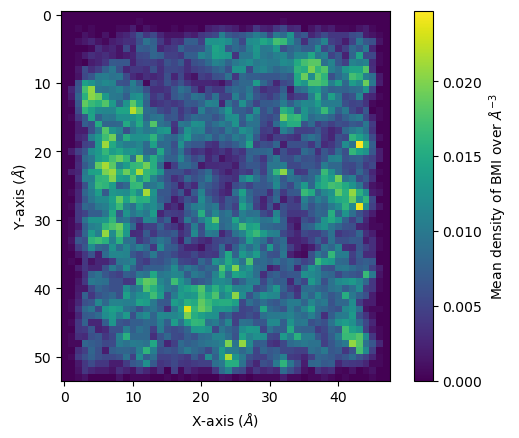

In [11]:
avg = grid.mean(axis=-1)
print(avg.shape)

fig, ax = plt.subplots()

im = ax.imshow(avg)
cbar = plt.colorbar(im)
cbar.set_label('Mean density of BMI over $\AA^{-3}$')
plt.xlabel('X-axis ($\AA$)')
plt.ylabel('Y-axis ($\AA$)')
plt.show()

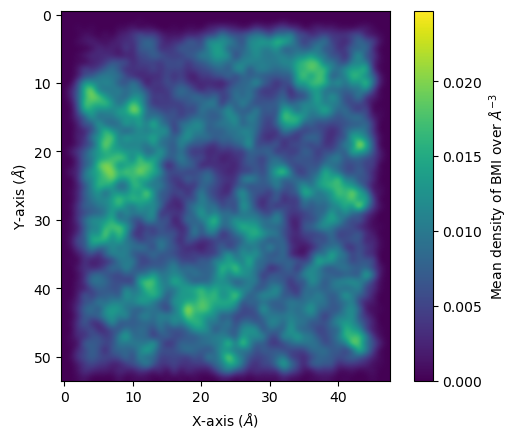

In [12]:
fig, ax = plt.subplots()

im = ax.imshow(avg,interpolation="bicubic")
cbar = plt.colorbar(im)
cbar.set_label('Mean density of BMI over $\AA^{-3}$')
plt.xlabel('X-axis ($\AA$)')
plt.ylabel('Y-axis ($\AA$)')
plt.show()

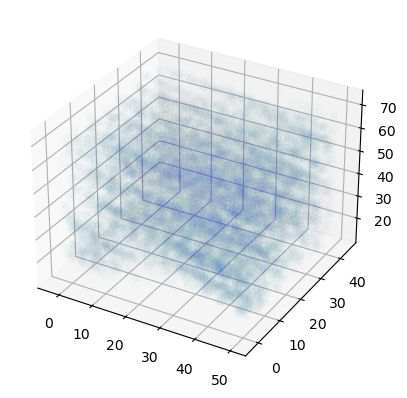

In [13]:
mx, my, mz = dens.results.density.midpoints
grid = dens.results.density.grid
flat = grid.ravel() / (grid.max()*10)
blue = [44, 130, 201, 1]
colors = [blue] * len(mx) * len(my) * len(mz)
colors = np.array(colors, dtype=float)
colors[:, -1] *= flat
colors[:, :3] /= 255
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.meshgrid(mx, my, mz)

ax.scatter(x, y, z, c=colors)
plt.show()

# Radial distribution function between graphene and solvent

In [14]:
from MDAnalysis.analysis import rdf

grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_C = u1.select_atoms('resname grp and segid C')
grp_D = u1.select_atoms('resname grp and segid D')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')

grps = [grp_A, grp_B, grp_C, grp_D]
solvs = [BMI_E, BF4_F, acn_G]

rdf_results = []

for grp in grps:
    for solv in solvs:
        irdf = rdf.InterRDF(grp, solv,
                            nbins=100,       # Number of histogram bins
                            range=(0.0, 25.0)  # Range of distances in angstroms
                           )
        irdf.run()
        rdf_results.append(irdf)

In [15]:
print(len(rdf_results))

12


In [16]:
rdf_results[0].results.bins

array([ 0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,  1.875,
        2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,  3.875,
        4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,  5.875,
        6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,  7.875,
        8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,  9.875,
       10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625, 11.875,
       12.125, 12.375, 12.625, 12.875, 13.125, 13.375, 13.625, 13.875,
       14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875,
       16.125, 16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875,
       18.125, 18.375, 18.625, 18.875, 19.125, 19.375, 19.625, 19.875,
       20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875,
       22.125, 22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875,
       24.125, 24.375, 24.625, 24.875])

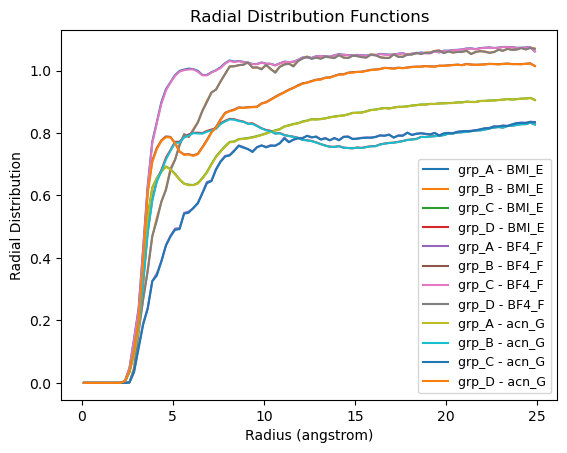

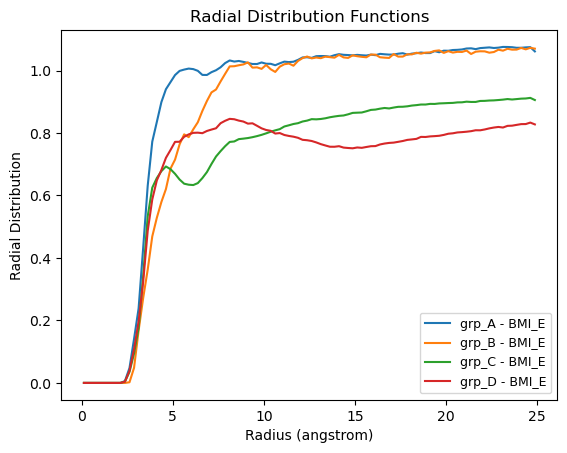

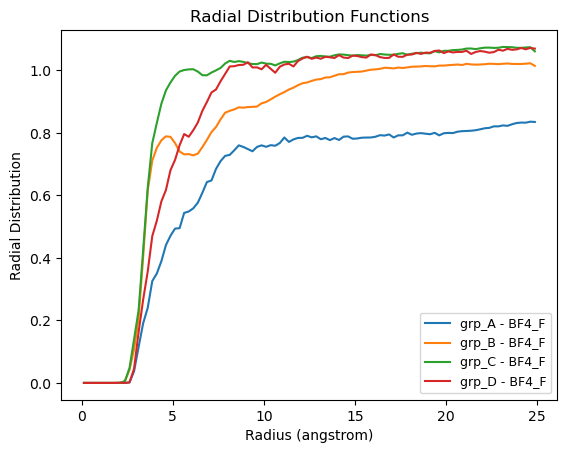

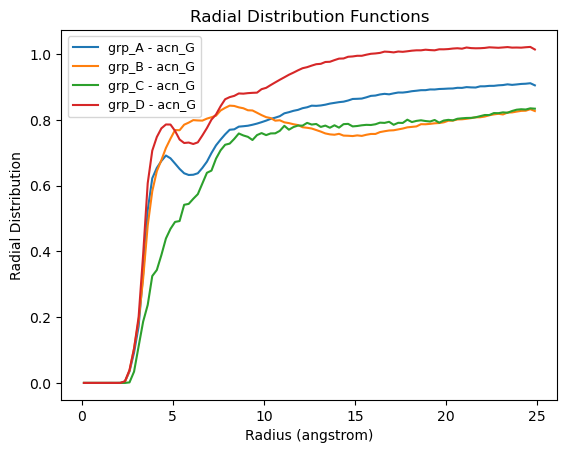

In [17]:
import matplotlib.pyplot as plt

for irdf in rdf_results:
    plt.plot(irdf.results.bins, irdf.results.rdf)
    plt.xlabel('Radius (angstrom)')
    plt.ylabel('Radial Distribution')
    plt.legend(["grp_A - BMI_E", "grp_B - BMI_E", "grp_C - BMI_E", "grp_D - BMI_E",
                "grp_A - BF4_F", "grp_B - BF4_F", "grp_C - BF4_F", "grp_D - BF4_F",
                "grp_A - acn_G", "grp_B - acn_G", "grp_C - acn_G", "grp_D - acn_G"],fontsize=9)
    plt.title('Radial Distribution Functions')
    plt.grid()
plt.show()
    
for irdf in rdf_results[0:4]:
    plt.plot(irdf.results.bins, irdf.results.rdf)
    plt.xlabel('Radius (angstrom)')
    plt.ylabel('Radial Distribution')
    plt.legend(["grp_A - BMI_E", "grp_B - BMI_E", "grp_C - BMI_E", "grp_D - BMI_E",],fontsize=9)
    plt.title('Radial Distribution Functions')
    plt.grid()
plt.show()

for irdf in rdf_results[4:8]:
    plt.plot(irdf.results.bins, irdf.results.rdf)
    plt.xlabel('Radius (angstrom)')
    plt.ylabel('Radial Distribution')
    plt.legend(["grp_A - BF4_F", "grp_B - BF4_F", "grp_C - BF4_F", "grp_D - BF4_F"],fontsize=9)
    plt.title('Radial Distribution Functions')
    plt.grid()
plt.show()

for irdf in rdf_results[8:12]:
    plt.plot(irdf.results.bins, irdf.results.rdf)
    plt.xlabel('Radius (angstrom)')
    plt.ylabel('Radial Distribution')
    plt.legend(["grp_A - acn_G", "grp_B - acn_G", "grp_C - acn_G", "grp_D - acn_G"],fontsize=9)
    plt.title('Radial Distribution Functions')
    plt.grid()
plt.show()
    



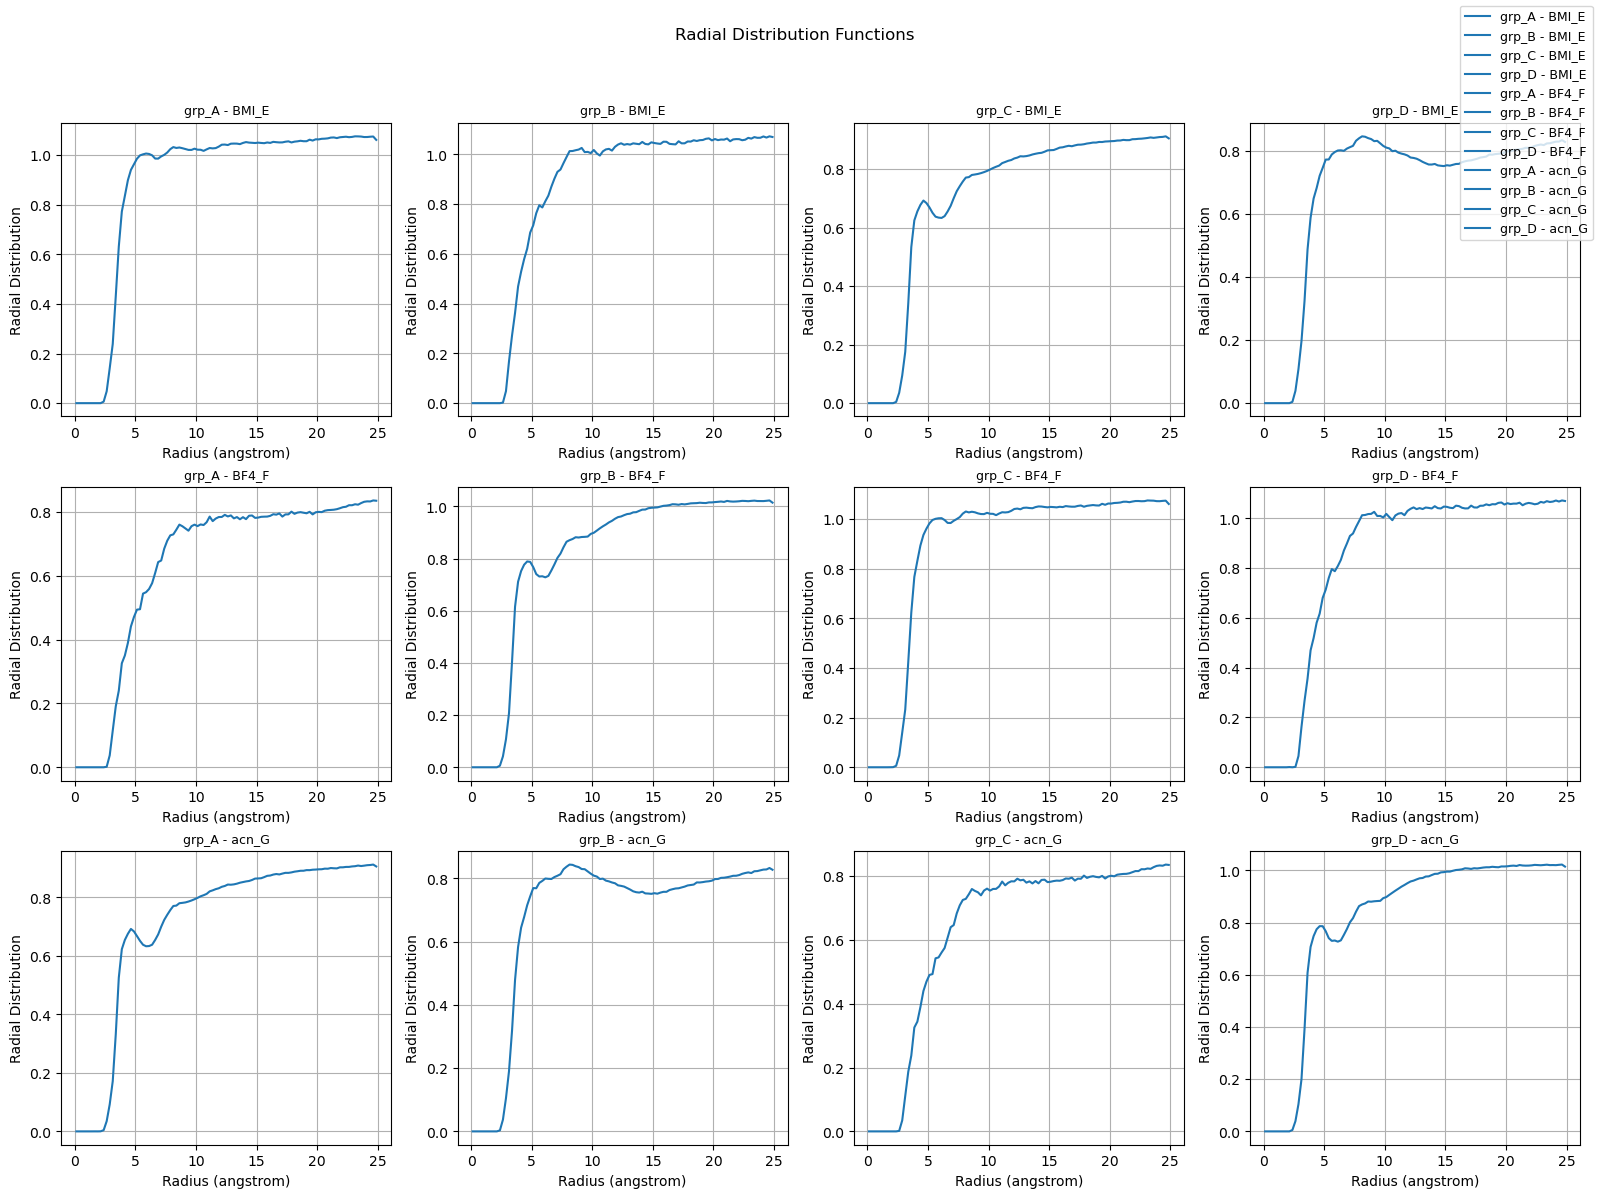

In [18]:
# Define labels for legend
labels = ["grp_A - BMI_E", "grp_B - BMI_E", "grp_C - BMI_E", "grp_D - BMI_E",
          "grp_A - BF4_F", "grp_B - BF4_F", "grp_C - BF4_F", "grp_D - BF4_F",
          "grp_A - acn_G", "grp_B - acn_G", "grp_C - acn_G", "grp_D - acn_G"]

# Create subplots to organize multiple RDF plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i, irdf in enumerate(rdf_results):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.plot(irdf.results.bins, irdf.results.rdf)
    ax.set_xlabel('Radius (angstrom)')
    ax.set_ylabel('Radial Distribution')
    ax.set_title(labels[i], fontsize=9)
    ax.grid()

# Adjust layout and legend
plt.tight_layout()
fig.legend(labels, loc='upper right', fontsize=9)
plt.subplots_adjust(top=0.9)
plt.suptitle('Radial Distribution Functions', fontsize=12)

# Show the plots
plt.show()

In [19]:
irdf2 = rdf.InterRDF(BMI_E, BF4_F)
irdf2.run()
irdf3 = rdf.InterRDF(BMI_E, acn_G)
irdf3.run()
irdf4 = rdf.InterRDF(BF4_F, acn_G)
irdf4.run()

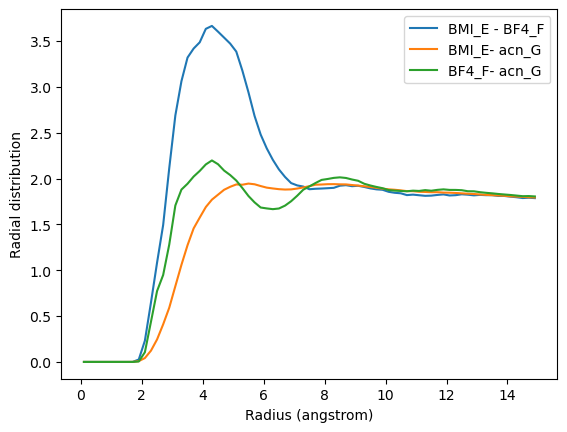

In [20]:
plt.plot(irdf2.results.bins, irdf2.results.rdf,label='BMI_E - BF4_F')
plt.plot(irdf3.results.bins, irdf3.results.rdf,label="BMI_E- acn_G")
plt.plot(irdf4.results.bins, irdf4.results.rdf,label="BF4_F- acn_G")
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.legend()

# Distance between graphene and solvent

In [21]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances

# Load your MD trajectory and select the relevant atoms
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_C = u1.select_atoms('resname grp and segid C')
grp_D = u1.select_atoms('resname grp and segid D')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')

n_grp_A= len(grp_A)
n_BMI_E= len(BMI_E)

print('grp_A has {} residues and BMI_E has {} residues'.format(n_grp_A,n_BMI_E))


grp_A has 800 residues and BMI_E has 3850 residues


In [22]:
dist_arr = distances.distance_array(grp_A.positions, # reference
                                    BMI_E.positions, # configuration
                                    box=u1.dimensions)
dist_arr.shape

(800, 3850)

Text(0, 0.5, 'Distance (Angstrom)')

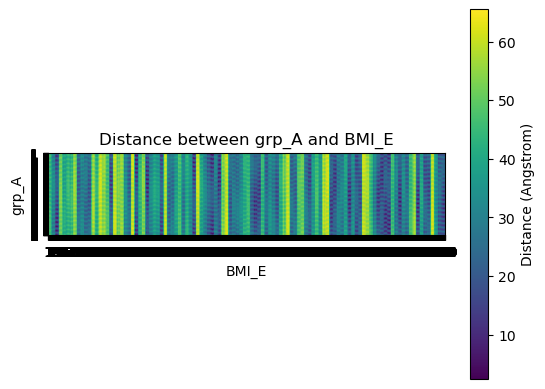

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

# add residue ID labels to axes
#ick_interval = 5
ax.set_yticks(np.arange(n_grp_A))
ax.set_xticks(np.arange(n_BMI_E))
ax.set_yticklabels(grp_A.resids)
ax.set_xticklabels(BMI_E.resids)

# add figure labels and titles
plt.ylabel('grp_A')
plt.xlabel('BMI_E')
plt.title('Distance between grp_A and BMI_E')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

In [24]:
grid = dens.results.density.grid
grid.shape

(54, 48, 60)

# Plot the Density verses Distance plot (not equilibrium yet) $\rightarrow$ The electrolyte distribute to both side, since the anion and cation attraction.

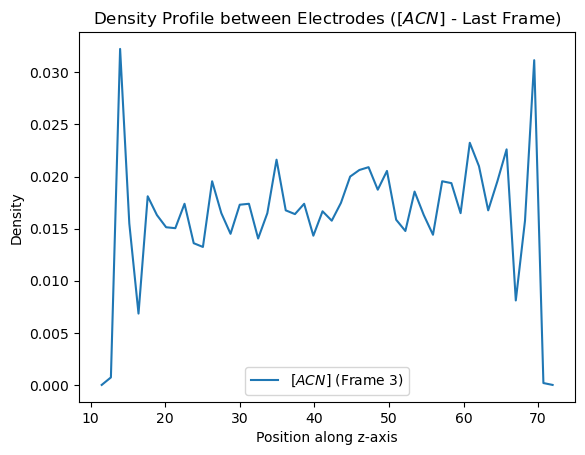

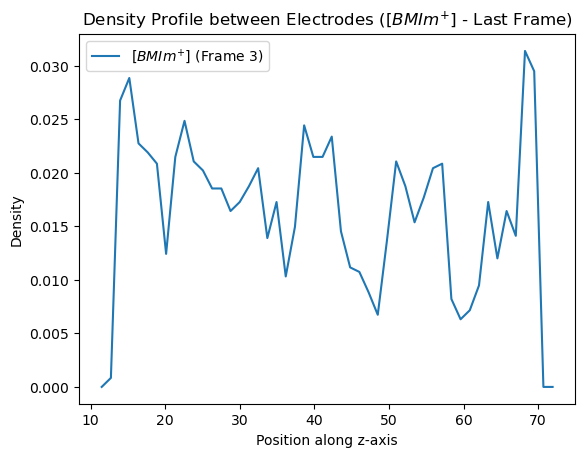

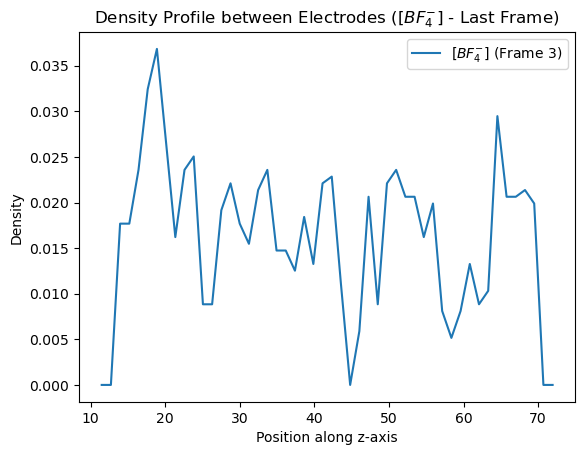

In [25]:
import MDAnalysis as mda
from MDAnalysis.analysis import density
import numpy as np
import matplotlib.pyplot as plt

# Load your MD trajectory and select the relevant AtomGroups (electrode, solvent, and electrolyte)
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_C = u1.select_atoms('resname grp and segid C')
grp_D = u1.select_atoms('resname grp and segid D')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')

# grp_A is cathode and grp_B is anode
grp_AB = grp_A | grp_B 

# Define the z-axis positions of your electrodes
electrode_z_positions = np.array(grp_AB.positions[:,2])

# Define the number of bins and the bin width for the density profile
num_bins = 50
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins

# Loop through frames in the trajectory
for component, component_name in [(acn_G, "$[ACN]$"), (BMI_E, "$[BMIm^{+}]$"), (BF4_F, "$[BF_{4}^{-}]$")]:
    # Initialize arrays to store positions and densities
    positions = []
    densities = []

    for ts in u1.trajectory:
        # Calculate the z-coordinates of the current component
        component_z_coords = np.array(component.positions[:, 2])

        # Calculate the density profile for this frame
        hist, bin_edges = np.histogram(
            component_z_coords,
            bins=num_bins,
            range=(min(electrode_z_positions), max(electrode_z_positions))
        )
        density = hist / (bin_width * len(component_z_coords))

        # Append the positions and densities to the respective arrays
        positions.append(bin_edges[:-1])  # Take the left edges of the bins
        densities.append(density)
    i=3
    # Create a plot for the current component
    plt.plot(positions[-1], densities[-1], label=f"{component_name} (Frame {i})")
    
    # Set axis labels and titles for the plot
    plt.xlabel("Position along z-axis")
    plt.ylabel("Density")
    plt.title(f"Density Profile between Electrodes ({component_name} - Last Frame)")
    plt.legend()
    
    # Show the plot for the current component
    plt.show()

<Figure size 1200x400 with 0 Axes>

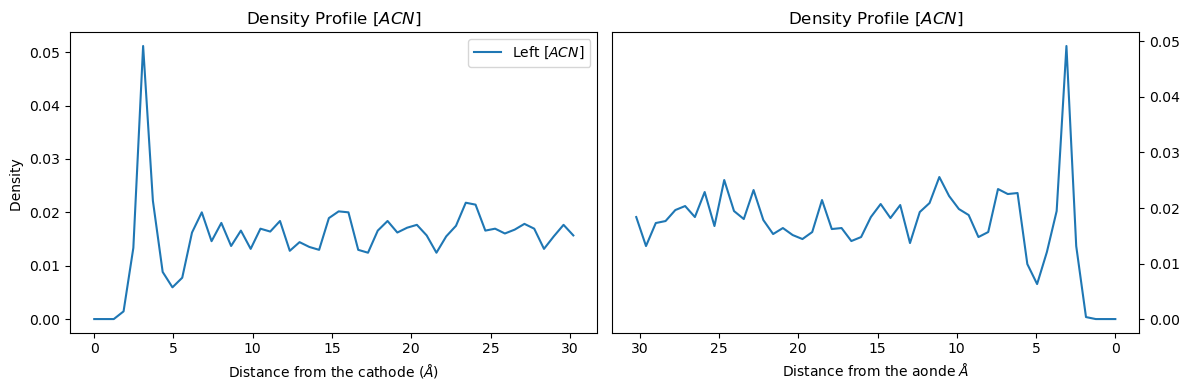

<Figure size 1200x400 with 0 Axes>

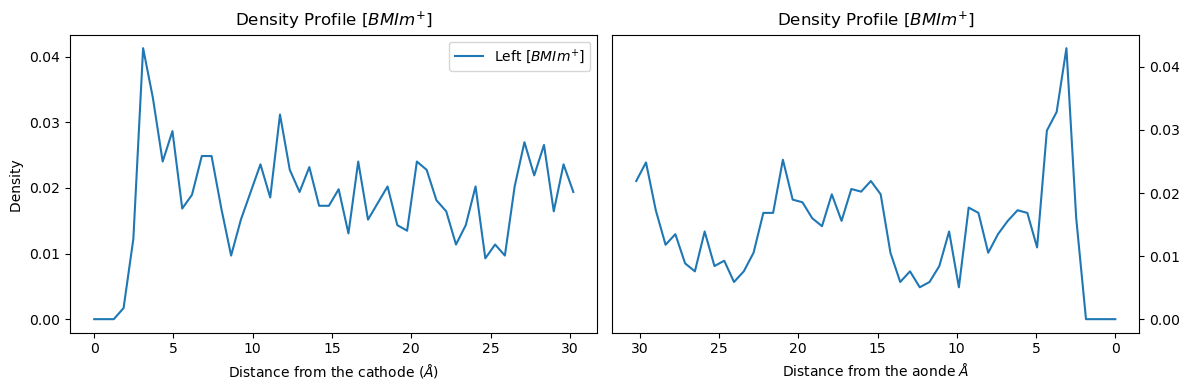

<Figure size 1200x400 with 0 Axes>

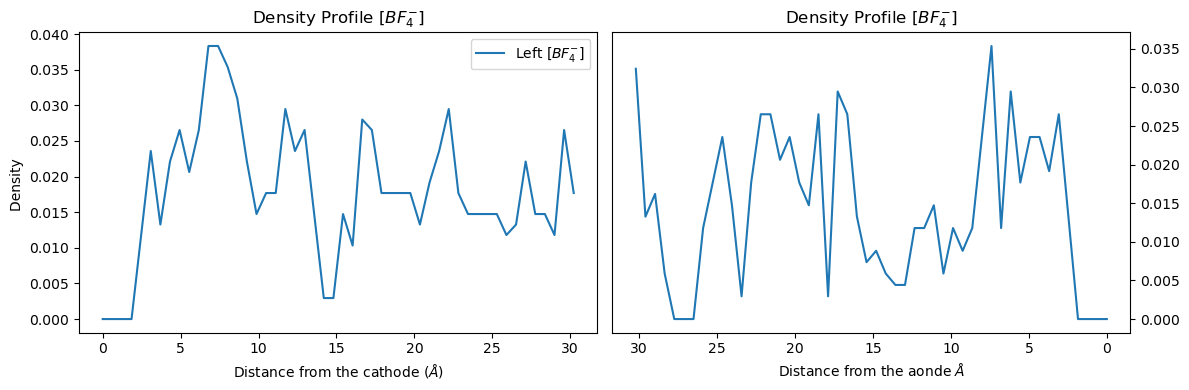

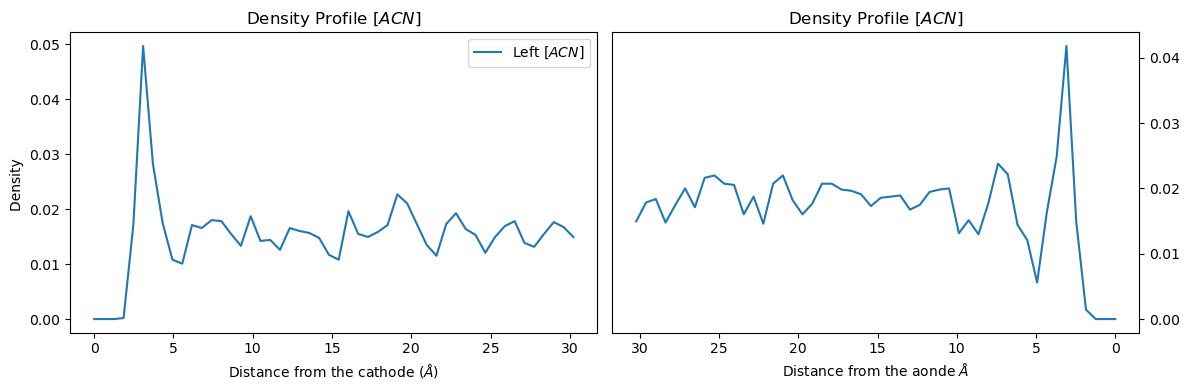

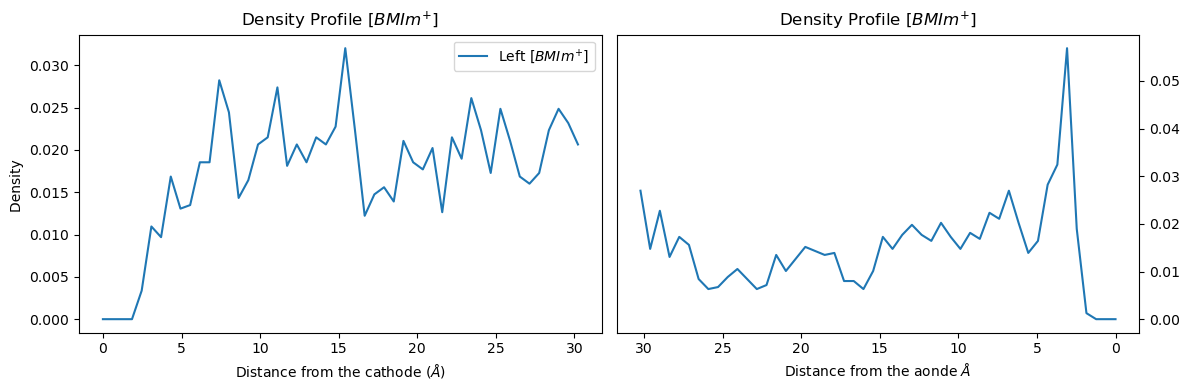

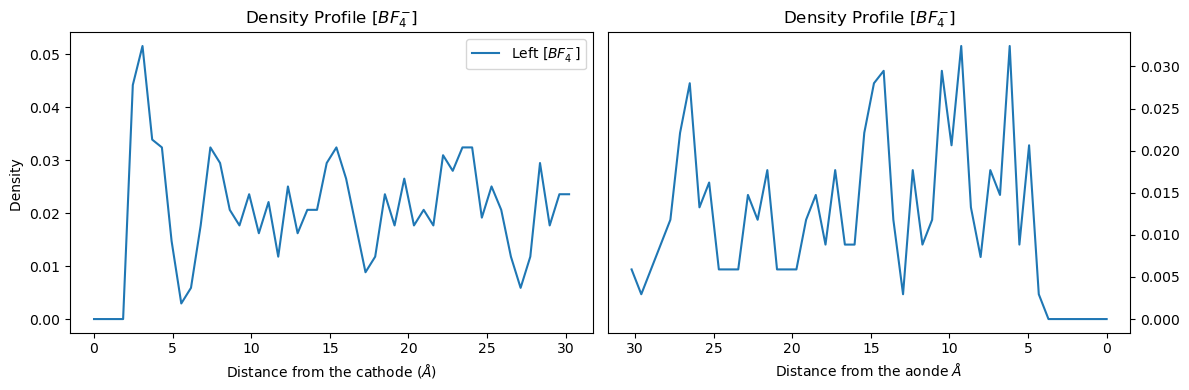

In [26]:
import MDAnalysis as mda
from MDAnalysis.analysis import density
import numpy as np
import matplotlib.pyplot as plt

# Load your MD trajectory and select the relevant AtomGroups (electrode, solvent, and electrolyte)
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_C = u1.select_atoms('resname grp and segid C')
grp_D = u1.select_atoms('resname grp and segid D')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')
grp_A2 = u2.select_atoms('resname grp and segid A')
grp_B2 = u2.select_atoms('resname grp and segid B')
grp_C2 = u2.select_atoms('resname grp and segid C')
grp_D2 = u2.select_atoms('resname grp and segid D')
BMI_E2 = u2.select_atoms('resname BMI and segid E')
BF4_F2 = u2.select_atoms('resname BF4 and segid F')
acn_G2 = u2.select_atoms('resname acn and segid G')

# grp_A is cathode and grp_B is anode
grp_AB = grp_A | grp_B
grp_AB2 = grp_A2 | grp_B2

# Define the z-axis positions of your electrodes
electrode_z_positions = np.array(grp_AB.positions[:,2])
electrode_z_positions_2 = np.array(grp_AB2.positions[:,2])

# Calculate the midpoint between electrodes
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
midpoint_2 = (max(electrode_z_positions_2) + min(electrode_z_positions_2)) / 2.0

# Define the number of bins and the bin width for the density profile
num_bins = 100
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
bin_width_2 = (max(electrode_z_positions_2) - min(electrode_z_positions_2)) / num_bins

# Initialize arrays to store positions and densities
positions = []
densities = []
positions_2 = []
densities_2 = []

# Loop through frames in the trajectory
for component, component_name in [(acn_G, "$[ACN]$"), (BMI_E, "$[BMIm^{+}]$"), (BF4_F, "$[BF_{4}^{-}]$")]:
    # Initialize arrays for left and right densities
    left_densities = []
    right_densities = []

    for ts in u1.trajectory:
        # Calculate the z-coordinates of the current component
        component_z_coords = np.array(component.positions[:, 2])

        # Calculate the density profile for this frame
        hist, bin_edges = np.histogram(
            component_z_coords,
            bins=num_bins,
            range=(min(electrode_z_positions), max(electrode_z_positions))
        )
        density = hist / (bin_width * len(component_z_coords))

        # Split the density profile into left and right parts
        left_density = density[bin_edges[:-1] < midpoint]
        right_density = density[bin_edges[:-1] >= midpoint]

        # Append the left and right densities to the respective arrays
        left_densities.append(left_density)
        right_densities.append(right_density)
        
    i = 49 # index of last frame
    # Create a plot for the current component
    plt.figure(figsize=(12, 4))  # Set figure size
    plt.figure(figsize=(12, 4))  # Set figure size

    # Create the left subplot
    plt.subplot(1, 2, 1)
    plt.plot(
        np.arange(0, len(left_densities[-1])) * bin_width,
        left_densities[i],
        label=f"Left {component_name}"
    )
    plt.xlabel("Distance from the cathode ($\AA$)")
    plt.ylabel("Density ")
    plt.title(f"Density Profile {component_name}")
    plt.legend()

    # Create the right subplot
    plt.subplot(1, 2, 2)
    plt.plot(
        np.arange(0, len(right_densities[-1])) * bin_width,
        right_densities[i][::-1],  # Reverse the density values for plotting
        label=f"Right {component_name} "
    )
    plt.gca().invert_xaxis()  # Reverse the x-axis for the right subplot
    plt.xlabel("Distance from the aonde $\AA$")

    # Create a twin axes for the right subplot
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    plt.title(f"Density Profile {component_name}")
    
    plt.tight_layout()  # Ensure subplots don't overlap

for component_2, component_name_2 in [(acn_G2, "$[ACN]$"), (BMI_E2, "$[BMIm^{+}]$"), (BF4_F2, "$[BF_{4}^{-}]$")]:
    # Initialize arrays for left and right densities

    right_densities_2 = []
    left_densities_2 = []

    for ts in u2.trajectory:
        # Calculate the z-coordinates of the current component
        component_z_coords_2 = np.array(component_2.positions[:, 2])

        # Calculate the density profile for this frame
        hist, bin_edges = np.histogram(
            component_z_coords_2,
            bins=num_bins,
            range=(min(electrode_z_positions_2), max(electrode_z_positions_2))
        )
        density = hist / (bin_width_2 * len(component_z_coords_2))

        # Split the density profile into left and right parts
        left_density = density[bin_edges[:-1] < midpoint_2]
        right_density = density[bin_edges[:-1] >= midpoint_2]

        # Append the left and right densities to the respective arrays
        left_densities_2.append(left_density)
        right_densities_2.append(right_density)
        
    i = 49 # index of last frame
    # Create a plot for the current component
    plt.figure(figsize=(12, 4))  # Set figure size

    # Create the left subplot
    plt.subplot(1, 2, 1)
    plt.plot(
        np.arange(0, len(left_densities_2[-1])) * bin_width_2,
        left_densities_2[i],
        label=f"Left {component_name_2}"
    )
    plt.xlabel("Distance from the cathode ($\AA$)")
    plt.ylabel("Density ")
    plt.title(f"Density Profile {component_name_2}")
    plt.legend()

    # Create the right subplot
    plt.subplot(1, 2, 2)
    plt.plot(
        np.arange(0, len(right_densities_2[-1])) * bin_width_2,
        right_densities_2[i][::-1],  # Reverse the density values for plotting
        label=f"Right {component_name_2} "
    )
    plt.gca().invert_xaxis()  # Reverse the x-axis for the right subplot
    plt.xlabel("Distance from the aonde $\AA$")

    # Create a twin axes for the right subplot
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    plt.title(f"Density Profile {component_name_2}")
    
    plt.tight_layout()  # Ensure subplots don't overlap

plt.show()


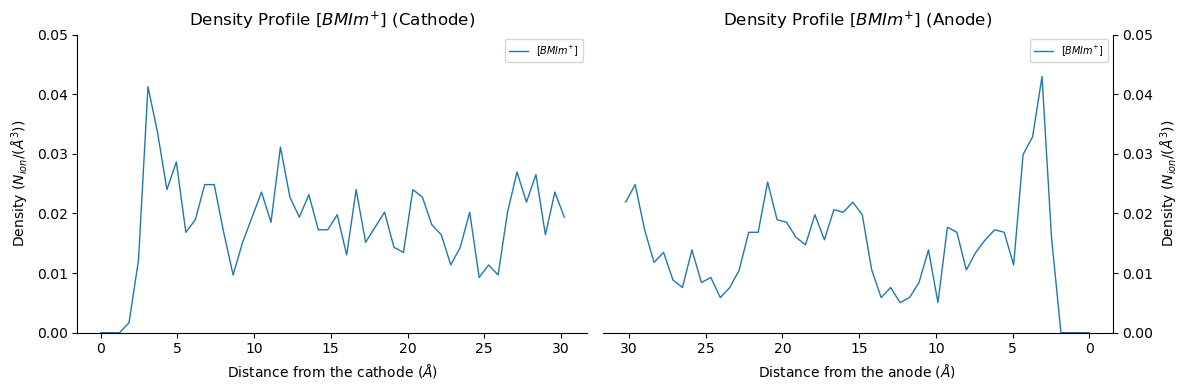

In [3]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot 

grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
BMI_E = u1.select_atoms('resname BMI and segid E')
grp_AB = grp_A | grp_B

electrode_z_positions = np.array(grp_AB.positions[:, 2])
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
num_bins = 100
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins

left_densities = []
right_densities = []

def calculate_density(u, component, electrode_z_positions, num_bins, midpoint):
    densities = []
    for ts in u.trajectory: # iterates through each frame (time step) in the trajectory
        component_z_coords = np.array(component.positions[:, 2]) #The position of component in z axis 
        hist, bin_edges = np.histogram(
            component_z_coords,
            bins=num_bins, # len()=101, bin_edges = num_bins + 1
            range=(min(electrode_z_positions), max(electrode_z_positions))
        )
        # normalizes the histogram values by dividing each histogram count by the product of the bin width and the total number of data points (how many component_z_coords)
        # There may be have same z coord solvents, so the devide by len(component_z_coords) is necessary to normalization
        # line density for z axis which can be refered to  3 dimension (volume density)
        density = hist / (bin_width * len(component_z_coords)) 
        left_density = density[bin_edges[:-1] < midpoint] # choose the density from the left to the middle of the two electrodes (len=25)
        right_density = density[bin_edges[:-1] >= midpoint]
        densities.append((left_density, right_density)) # len(densities) = 50, densities list is one pair for each frame in the trajectory.
    return densities

densities= calculate_density(u1, BMI_E, electrode_z_positions, num_bins, midpoint)
left_densities.append(densities[-1][0])
right_densities.append(densities[-1][1])

plt.figure(figsize=(12, 4))
left_subplot = plt.subplot(1, 2, 1)
right_subplot = plt.subplot(1, 2, 2)

left_density = left_densities[0]
right_density = right_densities[0]

left_subplot.plot(
            np.arange(0, len(left_density)) * bin_width,
            left_density,
            lw="1.0",
            label='$[BMIm^{+}]$'
        )

left_subplot.set_xlabel("Distance from the cathode ($\AA$)")
left_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
left_subplot.set_ylim(0,0.05)
left_subplot.spines['right'].set_visible(False)
left_subplot.spines['top'].set_visible(False)
left_subplot.set_title('Density Profile $[BMIm^{+}]$ (Cathode)')
left_subplot.legend(fontsize=7)

right_subplot.plot(
    np.arange(0, len(right_density)) * bin_width,
    right_density[::-1],
    lw="1.0",
    label='$[BMIm^{+}]$'
)

right_subplot.set_xlabel("Distance from the anode ($\AA$)")
right_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
right_subplot.set_ylim(0,0.05)
right_subplot.spines['left'].set_visible(False)
right_subplot.spines['top'].set_visible(False)
right_subplot.set_title("Density Profile $[BMIm^{+}]$ (Anode)")
right_subplot.legend(fontsize=7)

plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.tight_layout()

# Show the plots
plt.show()

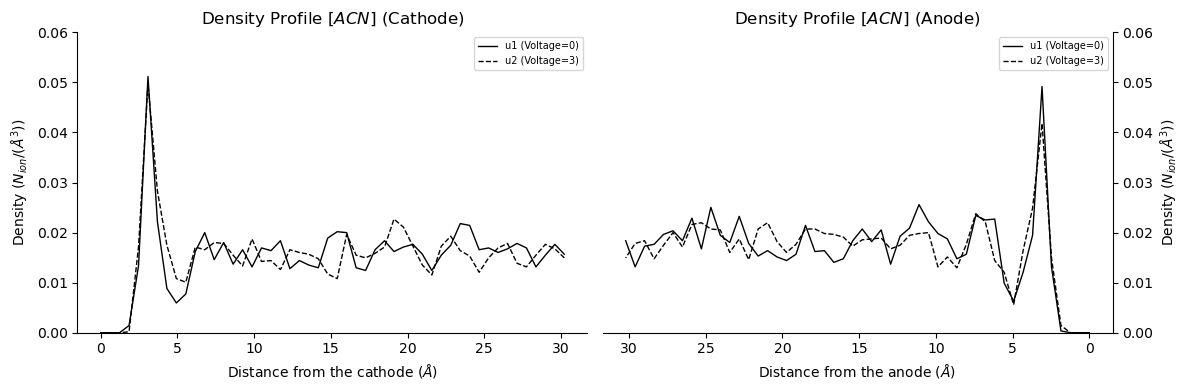

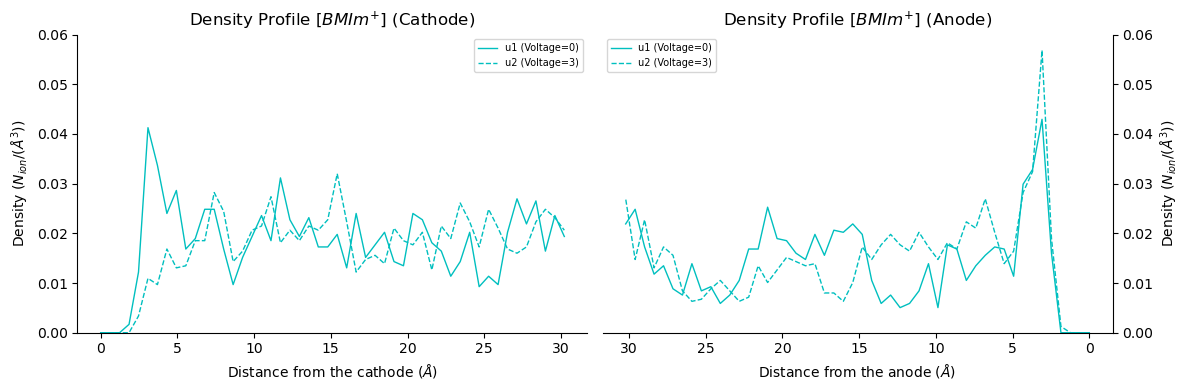

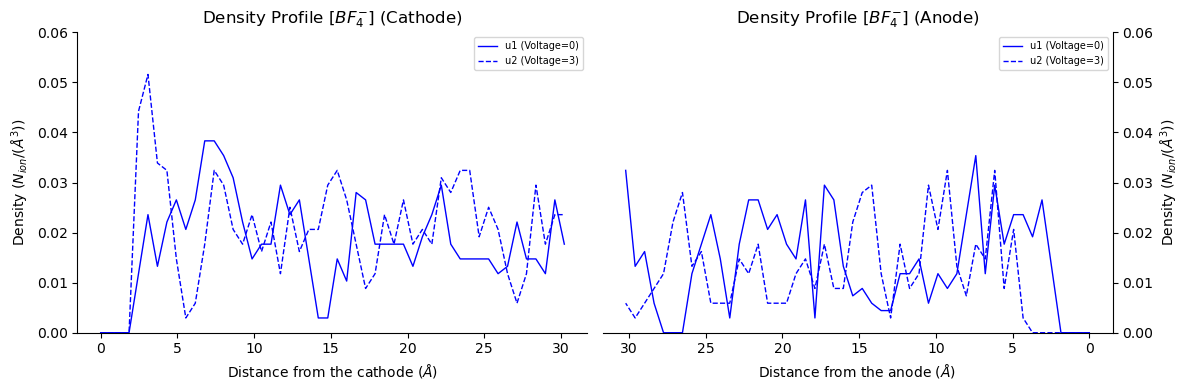

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot 
# import scienceplots
# plt.style.use(['science','notebook', 'grid'])


# Define electrode and universe labels
system_label = ["u1 (Voltage=0)", "u2 (Voltage=3)"]

# Customize the style of the plot
linestyles = {'u1 (Voltage=0)' : '-', 'u2 (Voltage=3)' : '--'}
component_colors = {"$[ACN]$": 'k',"$[BMIm^{+}]$": 'c',"$[BF_{4}^{-}]$": 'b'}
    
# Select atoms for analysis
grp_A = u1.select_atoms('resname grp and segid A')
grp_B = u1.select_atoms('resname grp and segid B')
grp_A2 = u2.select_atoms('resname grp and segid A')
grp_B2 = u2.select_atoms('resname grp and segid B')
BMI_E = u1.select_atoms('resname BMI and segid E')
BF4_F = u1.select_atoms('resname BF4 and segid F')
acn_G = u1.select_atoms('resname acn and segid G')
grp_A2 = u2.select_atoms('resname grp and segid A')
grp_B2 = u2.select_atoms('resname grp and segid B')
grp_C2 = u2.select_atoms('resname grp and segid C')
grp_D2 = u2.select_atoms('resname grp and segid D')
BMI_E2 = u2.select_atoms('resname BMI and segid E')
BF4_F2 = u2.select_atoms('resname BF4 and segid F')
acn_G2 = u2.select_atoms('resname acn and segid G')
grp_AB = grp_A | grp_B
grp_AB2 = grp_A2 | grp_B2

# List of components to plot
components = [(acn_G, "$[ACN]$"), (BMI_E, "$[BMIm^{+}]$"), (BF4_F, "$[BF_{4}^{-}]$")]
components_2 = [(acn_G2, "$[ACN]$"), (BMI_E2, "$[BMIm^{+}]$"), (BF4_F2, "$[BF_{4}^{-}]$")]

# Find out the position of two electrode in z axis
electrode_z_positions = np.array(grp_AB.positions[:, 2])
electrode_z_positions_2 = np.array(grp_AB2.positions[:, 2])

# Calculate the midpoint between electrodes
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
midpoint_2 = (max(electrode_z_positions_2) + min(electrode_z_positions_2)) / 2.0

# Define the number of bins and the bin width for the density profile (evaluate the number of atoms in each bin )
num_bins = 100
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
bin_width_2 = (max(electrode_z_positions_2) - min(electrode_z_positions_2)) / num_bins

# Initialize arrays to store densities
# each side of densities (set us dict) contain half of u1 and u2 data
left_densities = {key: [] for key in system_label}
right_densities = {key: [] for key in system_label}

# Define function for density calculation
def calculate_density(u, component, electrode_z_positions, num_bins, midpoint):
    densities = []
    for ts in u.trajectory: # iterates through each frame (time step) in the trajectory
        component_z_coords = np.array(component.positions[:, 2]) #The position of component in z axis 
        hist, bin_edges = np.histogram(
            component_z_coords,
            bins=num_bins, # len()=101, bin_edges = num_bins + 1
            range=(min(electrode_z_positions), max(electrode_z_positions))
        )
        # normalizes the histogram values by dividing each histogram count by the product of the bin width and the total number of data points (how many component_z_coords)
        # There may be have same z coord solvents, so the devide by len(component_z_coords) is necessary to normalization
        # line density for z axis which can be refered to  3 dimension (volume density)
        density = hist / (bin_width * len(component_z_coords)) 
        left_density = density[bin_edges[:-1] < midpoint] # choose the density from the left to the middle of the two electrodes (len=25)
        right_density = density[bin_edges[:-1] >= midpoint]
        densities.append((left_density, right_density)) # len(densities) = 50, densities list is one pair for each frame in the trajectory.
    return densities

# Calculate densities for u1 (voltage=0) and u2 (voltage=3) for the last frame
# Append all the data of each components (of u1 and u2) to our both side densities dict in corresponding key (system label) 
for component, component_name in components :
    densities = calculate_density(u1 , component,electrode_z_positions , num_bins, midpoint ) 
    left_densities["u1 (Voltage=0)"].append(densities[-1][0]) # last frame of the density profile ("densities" list), and choose the left_density 
    right_densities["u1 (Voltage=0)"].append(densities[-1][1]) # last frame of the density profile, and choose the right_density

for component, component_name in components_2:
    densities = calculate_density(u2, component, electrode_z_positions_2, num_bins, midpoint_2)
    left_densities["u2 (Voltage=3)"].append(densities[-1][0])
    right_densities["u2 (Voltage=3)"].append(densities[-1][1])

# Create subplots for each component
for component, component_name in components:
    plt.figure(figsize=(12, 4))
    left_subplot = plt.subplot(1, 2, 1)
    right_subplot = plt.subplot(1, 2, 2)
     
    
    for system in system_label:
    # each system has three density profiles of each component (from line 72 ~ 80), so for example "left_density" has all u1 and u2 three components left side density profiles
    # Notice that '[components.index((component, component_name))]' doesnt mean it extract the data from the components list, it just a index for label which density array I choose 
        left_density = left_densities[system][components.index((component, component_name))]   
        right_density = right_densities[system][components.index((component, component_name))]

        left_subplot.plot(
            np.arange(0, len(left_density)) * bin_width,
            left_density,
            color=component_colors[component_name],
            linestyle=linestyles[system],
            lw="1.0",
            label=f"{system}"
        )

        left_subplot.set_xlabel("Distance from the cathode ($\AA$)")
        left_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        left_subplot.set_ylim(0,0.06)
        left_subplot.spines['right'].set_visible(False)
        left_subplot.spines['top'].set_visible(False)
        left_subplot.set_title(f"Density Profile {component_name} (Cathode)")
        left_subplot.legend(fontsize=7)

        right_subplot.plot(
            np.arange(0, len(right_density)) * bin_width,
            right_density[::-1],
            color=component_colors[component_name],
            linestyle=linestyles[system],
            lw="1.0",
            label=f"{system}"
        )
        right_subplot.set_xlabel("Distance from the anode ($\AA$)")
        right_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        right_subplot.set_ylim(0,0.06)
        right_subplot.spines['left'].set_visible(False)
        right_subplot.spines['top'].set_visible(False)
        right_subplot.set_title(f"Density Profile {component_name} (Anode)")
        right_subplot.legend(fontsize=7)

    plt.gca().invert_xaxis()
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    plt.tight_layout()

# Show the plots
plt.show()

